# Discrete Transform



Program ini menerapkan tiga jenis transformasi diskrit pada citra:
*   Discrete Cosine Transform (DCT): Mengubah citra ke domain frekuensi menggunakan kosinus.
*   Discrete Sine Transform (DST): Mengubah citra ke domain frekuensi menggunakan sinus.
*  Discrete Hartley Transform (DHT): Mengubah citra ke domain frekuensi dengan kombinasi kosinus dan sinus.




In [1]:
# Impor library yang diperlukan
import cv2                               # Library OpenCV untuk pengolahan citra digital
import numpy as np                       # Library NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Library Matplotlib untuk visualisasi gambar
from google.colab import files           # Modul untuk mengunggah file di Google Colab
from scipy.fftpack import dct, dst, fft  # Modul dari SciPy untuk transformasi DCT, DST, dan DHT

In [2]:
# Mengunggah gambar dari lokal
print("Unggah gambar yang ingin diproses (format .jpg, .png, dll.)")  # Menampilkan pesan untuk meminta pengguna mengunggah gambar
uploaded = files.upload()                # Mengunggah gambar dan menyimpannya dalam variabel uploaded (berupa dictionary)

Unggah gambar yang ingin diproses (format .jpg, .png, dll.)


Saving lena 2.0.jpg to lena 2.0.jpg


In [3]:
# Memuat gambar yang diunggah
filename = next(iter(uploaded))          # Mengambil nama file pertama dari dictionary uploaded
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Memuat gambar dalam mode Grayscale untuk mempermudah transformasi

In [4]:
# Mendefinisikan fungsi untuk Discrete Cosine Transform (DCT)
def apply_dct(image):
    return dct(dct(image, axis=0, norm='ortho'), axis=1, norm='ortho')  # Menerapkan DCT 2D pada gambar

In [5]:
# Mendefinisikan fungsi untuk Discrete Sine Transform (DST)
def apply_dst(image):
    return dst(dst(image, axis=0, norm='ortho'), axis=1, norm='ortho')  # Menerapkan DST 2D pada gambar

In [6]:
# Mendefinisikan fungsi untuk Discrete Hartley Transform (DHT)
def apply_dht(image):
    return fft(image, axis=0).real + fft(image, axis=1).real  # Menerapkan DHT 2D pada gambar

In [7]:
# Menerapkan transformasi pada gambar
dct_image = apply_dct(image)             # Menerapkan DCT pada gambar
dst_image = apply_dst(image)             # Menerapkan DST pada gambar
dht_image = apply_dht(image)             # Menerapkan DHT pada gambar

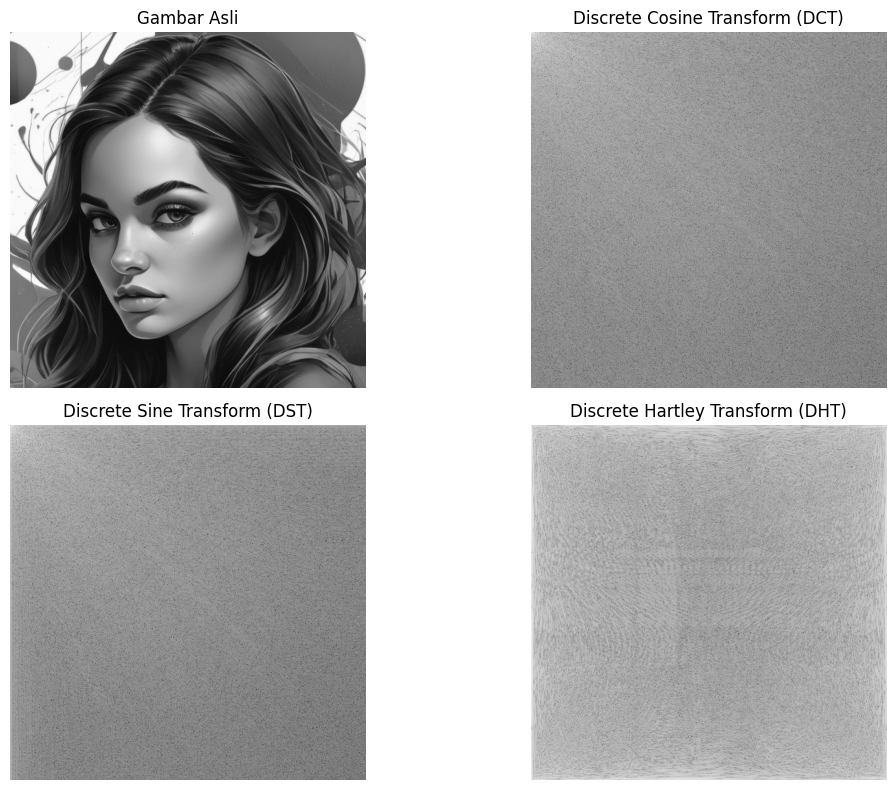

In [8]:
# Menampilkan hasil dalam satu frame
plt.figure(figsize=(12, 8))              # Membuat figure dengan ukuran 12x8 inci untuk menampung empat subplot

# Gambar Asli
plt.subplot(2, 2, 1)                     # Membuat subplot pada posisi 1 (baris 2, kolom 2, indeks 1)
plt.imshow(image, cmap='gray')           # Menampilkan gambar asli dalam skala abu-abu
plt.title('Gambar Asli')                 # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu untuk tampilan yang lebih bersih

# Hasil DCT
plt.subplot(2, 2, 2)                     # Membuat subplot pada posisi 2
plt.imshow(np.log(np.abs(dct_image)), cmap='gray')  # Menampilkan magnitude DCT dalam skala logaritmik
plt.title('Discrete Cosine Transform (DCT)')  # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil DST
plt.subplot(2, 2, 3)                     # Membuat subplot pada posisi 3
plt.imshow(np.log(np.abs(dst_image)), cmap='gray')  # Menampilkan magnitude DST dalam skala logaritmik
plt.title('Discrete Sine Transform (DST)')  # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil DHT
plt.subplot(2, 2, 4)                     # Membuat subplot pada posisi 4
plt.imshow(np.log(np.abs(dht_image)), cmap='gray')  # Menampilkan magnitude DHT dalam skala logaritmik
plt.title('Discrete Hartley Transform (DHT)')  # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

plt.tight_layout()                       # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show()                               # Menampilkan semua subplot dalam satu frame